<a href="https://colab.research.google.com/github/sperezp23/Proyecto_final_Ingenia_UdeA/blob/main/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Proyecto final Ingenia: Introducción a la programación para el ML**<br><br>

Por: Santiago Pérez Puerta<br><br>

<p><a name="contenido"></a></p>

# **Contenido**
- <a href="#Librerias">Librerías implementadas</a><br>
- <a href="#Limpieza">Carga y limpieza de datos</a><br>
- <a href="#AED">Análisis exploratório de datos</a><br>
- <a href="#Preguntas">Solución a las preguntas</a><br>
- <a href="#Extra">Analisis por grupos</a><br>

<p><a name="Librerias"></a></p>

# **Librerías implementadas**

<a href="#contenido">Volver al contenido</a><br>

In [1]:
# %% LIBRERÍAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<p><a name="Limpieza"></a></p>

# **Carga y limpieza de datos.**

<a href="#contenido">Volver al contenido</a><br>

In [2]:
# %% CARGAR INFORMACIÓN
deporte_df = pd.read_csv('/content/Dataset_deporte_original.csv')
deporte_df.sample(5)

,Marca temporal,Nombre completo (Nombre y apellidos),Genero,Edad,Nacionalidad,Ciudad de nacimiento,Ciudad de residencia,Nivel académico máximo,Estado civil,Numero de hijos,Empleo,Tipo de vivienda,Estrato socioeconómico,¿Hace deporte en la semana?,¿Con que frecuencia hace realiza actividad física cada semana?
45,1/11/2023 19:28:50,Gisell vanegas,Femenino,21,Colombia,Bogotá,Bogotá,Tecnico,Soltero,0,Informal,Familiar,2,Sí,2
10,28/10/2023 21:07:31,Marleny Puerta Gonzalez,Femenino,58,Colombiana,Medellin,Medellin,Tecnologo,Casado,2,Formal,Propia,4,Sí,2
52,2/11/2023 15:07:36,Gladys Yanneth Ruiz García,Femenino,50,Colombiana,Medellín,Envigado,Tecnologo,Casado,1,Formal,Propia,4,Sí,3
51,2/11/2023 14:32:48,Katherin Restrepo Rendon,Femenino,32,Colombiana,Medellín,Itagüí,Profesional,Union libre,0,Formal,Familiar,3,Sí,5
9,28/10/2023 20:27:07,Jose Muñoz,Masculino,24,Colombia,Medellín,Envigado,Profesional,Soltero,0,No posee,Arrendada,4,Sí,4


In [3]:
# %% Cantidad de variables y registros
filas,columnas = deporte_df.shape
print(f'Registros: {filas}\nVariables: {columnas}')

Registros: 54
Variables: 15


In [4]:
# %% COLUMNAS DEL DATAFRAME
deporte_df.columns

Index(['Marca temporal', 'Nombre completo (Nombre y apellidos)', 'Genero',
       'Edad', 'Nacionalidad', 'Ciudad de nacimiento', 'Ciudad de residencia',
       'Nivel académico máximo ', 'Estado civil', 'Numero de hijos', 'Empleo',
       'Tipo de vivienda', 'Estrato socioeconómico',
       '¿Hace deporte en la semana?',
       '¿Con que frecuencia hace realiza actividad física cada semana?'],
      dtype='object')

In [5]:
# %% MODIFICACIÓN DEL FORMATO DE LOS LOS TITULOS DE LAS COLUMNAS
deporte_df.columns = deporte_df.columns.str.strip().str.lower().str.replace(' ','_')
deporte_df.columns

Index(['marca_temporal', 'nombre_completo_(nombre_y_apellidos)', 'genero',
       'edad', 'nacionalidad', 'ciudad_de_nacimiento', 'ciudad_de_residencia',
       'nivel_académico_máximo', 'estado_civil', 'numero_de_hijos', 'empleo',
       'tipo_de_vivienda', 'estrato_socioeconómico',
       '¿hace_deporte_en_la_semana?',
       '¿con_que_frecuencia_hace_realiza_actividad_física_cada_semana?'],
      dtype='object')

In [6]:
# %% MODIFICACIÓN DEL NOMBRE DE ALGUNAS COLUMNAS
titulos_nuevos = {
    'estrato_socioeconómico':'estrato',
    'nombre_completo_(nombre_y_apellidos)':'nombre',
    'nivel_académico_máximo':'nivel_academico',
    '¿hace_deporte_en_la_semana?':'hace_deporte',
    '¿con_que_frecuencia_hace_realiza_actividad_física_cada_semana?':'frecuencia_ejercicio'
    }

deporte_df.rename(columns=titulos_nuevos,inplace=True)
deporte_df.head()

,marca_temporal,nombre,genero,edad,nacionalidad,ciudad_de_nacimiento,ciudad_de_residencia,nivel_academico,estado_civil,numero_de_hijos,empleo,tipo_de_vivienda,estrato,hace_deporte,frecuencia_ejercicio
0,28/10/2023 19:47:42,Santiago Pérez Puerta,Masculino,27,Colombiano,Medellín,Medellín,Profecional,Soltero,0,No posee,Familiar,4,Sí,1
1,28/10/2023 19:54:08,Sebastian Pérez Puerta,Masculino,18,Colombiano,Medellín,Medellín,Bachiller,Soltero,0,No posee,Familiar,4,No,0
2,28/10/2023 20:00:32,Reyk Sayk Alemán Acuña,Masculino,27,Colombia,Majagual,Medellín,Magister,Soltero,0,No posee,Familiar,2,No,0
3,28/10/2023 20:01:04,David Hurtado,Masculino,25,Colombia,Medellín,Medellín,Profesional,Soltero,0,Formal,Familiar,4,Sí,3
4,28/10/2023 20:03:48,Johan Arias,Masculino,18,Colombiana,Caldas,Medellín,Tecnico,Soltero,0,Informal,Arrendada,3,Sí,1


In [7]:
# %% INFORMACIÓN GENERAL DE DATASET
deporte_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   marca_temporal        54 non-null     object
 1   nombre                54 non-null     object
 2   genero                54 non-null     object
 3   edad                  54 non-null     int64 
 4   nacionalidad          54 non-null     object
 5   ciudad_de_nacimiento  54 non-null     object
 6   ciudad_de_residencia  54 non-null     object
 7   nivel_academico       54 non-null     object
 8   estado_civil          54 non-null     object
 9   numero_de_hijos       54 non-null     int64 
 10  empleo                54 non-null     object
 11  tipo_de_vivienda      54 non-null     object
 12  estrato               54 non-null     int64 
 13  hace_deporte          54 non-null     object
 14  frecuencia_ejercicio  54 non-null     int64 
dtypes: int64(4), object(11)
memory usage: 6.5+

In [8]:
# %% MODIFICACIÓN DE LOS TIPOS DE DATOS ALMACENADOS EN CADA VARIABLE
tipos_datos={
    'marca_temporal':'datetime64[ns]'
}

deporte_df = deporte_df.astype(tipos_datos)
deporte_df.dtypes

marca_temporal          datetime64[ns]
nombre                          object
genero                          object
edad                             int64
nacionalidad                    object
ciudad_de_nacimiento            object
ciudad_de_residencia            object
nivel_academico                 object
estado_civil                    object
numero_de_hijos                  int64
empleo                          object
tipo_de_vivienda                object
estrato                          int64
hace_deporte                    object
frecuencia_ejercicio             int64
dtype: object

In [9]:
deporte_df.sample(5)

,marca_temporal,nombre,genero,edad,nacionalidad,ciudad_de_nacimiento,ciudad_de_residencia,nivel_academico,estado_civil,numero_de_hijos,empleo,tipo_de_vivienda,estrato,hace_deporte,frecuencia_ejercicio
48,2023-01-11 20:25:54,Juliana Roldán Chica,Femenino,24,Colombiana,Medellín,Medellín,Profesional,Soltero,0,Formal,Propia,2,Sí,3
0,2023-10-28 19:47:42,Santiago Pérez Puerta,Masculino,27,Colombiano,Medellín,Medellín,Profecional,Soltero,0,No posee,Familiar,4,Sí,1
41,2023-01-11 17:41:52,Steven Mendez Velandia,Masculino,23,Colombiana,Bogotá,Bogotá,Tecnologo,Soltero,0,No posee,Arrendada,3,Sí,3
16,2023-10-28 22:41:52,Edgar David Riaño Ayala,Masculino,21,Colombiano,Bogotá D.C,Bogotá D.C,Tecnologo,Soltero,0,No posee,Familiar,2,Sí,5
35,2023-01-11 17:20:21,Carolina Parra Pino,Femenino,27,Colombiana,Medellín,Guarne,Profesional,Union libre,0,No posee,Arrendada,4,No,0


In [10]:
# %% MOSTRAR LOS REGISTROS UNICOS DE CADA COLUMNA
for columna in deporte_df.columns:
  print(f'{columna.upper()}\n\n{deporte_df[columna].unique()}\n{"-"*60}\n')

MARCA_TEMPORAL

['2023-10-28T19:47:42.000000000' '2023-10-28T19:54:08.000000000'
 '2023-10-28T20:00:32.000000000' '2023-10-28T20:01:04.000000000'
 '2023-10-28T20:03:48.000000000' '2023-10-28T20:07:59.000000000'
 '2023-10-28T20:09:59.000000000' '2023-10-28T20:15:40.000000000'
 '2023-10-28T20:16:00.000000000' '2023-10-28T20:27:07.000000000'
 '2023-10-28T21:07:31.000000000' '2023-10-28T21:10:43.000000000'
 '2023-10-28T21:12:50.000000000' '2023-10-28T21:16:32.000000000'
 '2023-10-28T22:25:54.000000000' '2023-10-28T22:41:49.000000000'
 '2023-10-28T22:41:52.000000000' '2023-10-28T23:52:36.000000000'
 '2023-10-29T21:51:31.000000000' '2023-10-30T10:23:47.000000000'
 '2023-10-30T15:58:10.000000000' '2023-10-30T15:58:31.000000000'
 '2023-10-30T16:05:46.000000000' '2023-10-30T16:19:01.000000000'
 '2023-10-30T16:20:36.000000000' '2023-10-30T16:26:33.000000000'
 '2023-10-30T16:51:49.000000000' '2023-10-30T16:54:38.000000000'
 '2023-01-11T16:34:51.000000000' '2023-01-11T16:36:48.000000000'
 '2023-01

In [11]:
# %% LIMPIEZA DEL DATOS
nacionalidad = ['Colombiano', 'Colombia ', 'Colombia', 'Colombiana', 'Colombiano ',
 'Colombiana ', 'COLOMBIANA', 'Columbiano ', 'Colombina ']

deporte_df.replace(nacionalidad,'Colombiano',inplace=True)
deporte_df.replace('Venezolana','Venezolano',inplace=True)

deporte_df.nacionalidad.unique()

array(['Colombiano', 'Venezolano'], dtype=object)

In [12]:
bogota = ['BOGOTÁ','Bogota ','Bogotá','Bogotá ','Bogotá D.C','Bogotá, DC.','Bogotá. DC']
medellin = ['Medellin','Medellin ','Medellín','Medellín ','Mesellin','11-08-2003','23/10/1999','29 enero 1999','MEDELLÍN','Calle 7 #4-42']

deporte_df.replace(bogota,'Bogota',inplace=True)
deporte_df.replace(medellin,'Medellin',inplace=True)
deporte_df.replace('Caqueza, Cundinamarca ','Caqueza',inplace=True)
deporte_df.replace('Caqueza, Cundinamarca ','Caqueza',inplace=True)
deporte_df.replace('Saladoblanco - Huila','Saladoblanco',inplace=True)
deporte_df.replace('Segovia Antioquia ','Segovia',inplace=True)
deporte_df.replace('Socorro Santander ','Socorro',inplace=True)
deporte_df.replace('Profecional','Profesional',inplace=True)
deporte_df.replace('Guayabetal - Cundinamarca','Guayabetal',inplace=True)

deporte_df.ciudad_de_nacimiento.unique()

<ipython-input-12-75bed823ff10>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  deporte_df.replace(medellin,'Medellin',inplace=True)


array(['Medellin', 'Majagual ', 'Caldas', 'Baranoa ', 'Caqueza', 'Bogota',
       'Amalfi', 'Girardot', 'Itagui', 'Segovia', 'Saladoblanco',
       'Socorro', 'Caracas', 'Bello', 'Envigado ', 'Apartado'],
      dtype=object)

In [13]:
deporte_df.sample(5)

,marca_temporal,nombre,genero,edad,nacionalidad,ciudad_de_nacimiento,ciudad_de_residencia,nivel_academico,estado_civil,numero_de_hijos,empleo,tipo_de_vivienda,estrato,hace_deporte,frecuencia_ejercicio
0,2023-10-28 19:47:42,Santiago Pérez Puerta,Masculino,27,Colombiano,Medellin,Medellin,Profesional,Soltero,0,No posee,Familiar,4,Sí,1
3,2023-10-28 20:01:04,David Hurtado,Masculino,25,Colombiano,Medellin,Medellin,Profesional,Soltero,0,Formal,Familiar,4,Sí,3
28,2023-01-11 16:34:51,Sofia Quimbay,Femenino,21,Colombiano,Bogota,Bogota,Bachiller,Soltero,0,No posee,Familiar,4,No,0
1,2023-10-28 19:54:08,Sebastian Pérez Puerta,Masculino,18,Colombiano,Medellin,Medellin,Bachiller,Soltero,0,No posee,Familiar,4,No,0
13,2023-10-28 21:16:32,Martha Cecilia Puerta Gonzalez,Femenino,61,Colombiano,Medellin,Medellin,Tecnologo,Soltero,0,No posee,Propia,2,No,0


<p><a name="AED"></a></p>

# **ANALISIS EXPLORATÓRIO DE DATOS.**

<a href="#contenido">Volver al contenido</a><br>

In [14]:
# %% Visualización inicial de la data limpia
deporte_df.sample(5)

,marca_temporal,nombre,genero,edad,nacionalidad,ciudad_de_nacimiento,ciudad_de_residencia,nivel_academico,estado_civil,numero_de_hijos,empleo,tipo_de_vivienda,estrato,hace_deporte,frecuencia_ejercicio
34,2023-01-11 16:49:06,Daniel Betancur Giraldo,Masculino,29,Colombiano,Medellin,Medellin,Profesional,Union libre,0,No posee,Familiar,4,Sí,5
43,2023-01-11 17:51:37,Guillermo Quintero González,Masculino,63,Colombiano,Medellin,Medellin,Tecnico,Soltero,0,No posee,Propia,2,Sí,7
2,2023-10-28 20:00:32,Reyk Sayk Alemán Acuña,Masculino,27,Colombiano,Majagual,Medellin,Magister,Soltero,0,No posee,Familiar,2,No,0
19,2023-10-30 10:23:47,Santiago Herrera Gomez,Masculino,29,Colombiano,Medellin,Medellin,Profesional,Soltero,0,Formal,Arrendada,3,Sí,2
14,2023-10-28 22:25:54,Tito Zapata Gonzalez,Masculino,26,Colombiano,Medellin,Medellin,Profesional,Soltero,0,Formal,Familiar,5,Sí,4


In [15]:
# %% TABLA DE FRECUENCIA
for column in list(deporte_df.columns)[2:]:
  print(f'{deporte_df[column].value_counts()}\n{"-"*60}\n')

Masculino    29
Femenino     25
Name: genero, dtype: int64
------------------------------------------------------------

24    7
21    6
26    5
27    5
25    4
23    4
19    3
18    3
22    2
29    2
58    2
50    2
61    1
57    1
28    1
20    1
48    1
63    1
39    1
30    1
32    1
Name: edad, dtype: int64
------------------------------------------------------------

Colombiano    52
Venezolano     2
Name: nacionalidad, dtype: int64
------------------------------------------------------------

Medellin        25
Bogota          15
Majagual         1
Caldas           1
Baranoa          1
Caqueza          1
Amalfi           1
Girardot         1
Itagui           1
Segovia          1
Saladoblanco     1
Socorro          1
Caracas          1
Bello            1
Envigado         1
Apartado         1
Name: ciudad_de_nacimiento, dtype: int64
------------------------------------------------------------

Medellin               24
Bogota                 15
Envigado                4
Pasto     

In [16]:
# %% Estadisticas vasicas de cada varaible numerica (Percentiles, media, minimo, maximo, desviación estandar)
estadisticas_df = deporte_df.describe()
estadisticas_df

,edad,numero_de_hijos,estrato,frecuencia_ejercicio
count,54.000000,54.000000,54.00000,54.000000
mean,28.851852,0.259259,3.00000,2.277778
std,12.032044,0.756985,1.00939,1.816244
min,18.000000,0.000000,1.00000,0.000000
25%,22.000000,0.000000,2.00000,0.250000
50%,25.000000,0.000000,3.00000,2.000000
75%,27.750000,0.000000,4.00000,3.000000
max,63.000000,4.000000,6.00000,7.000000


In [17]:
# %% Variaza de cada variable numerica
deporte_df.var(numeric_only=True).to_frame().rename(columns={0:'Varianza'})

,Varianza
edad,144.770091
numero_de_hijos,0.573026
estrato,1.018868
frecuencia_ejercicio,3.298742


In [18]:
# %% Moda de cada variable numerica
deporte_df.mode(numeric_only=True)

,edad,numero_de_hijos,estrato,frecuencia_ejercicio
0,24,0,3,0


In [19]:
deporte_df.columns

Index(['marca_temporal', 'nombre', 'genero', 'edad', 'nacionalidad',
       'ciudad_de_nacimiento', 'ciudad_de_residencia', 'nivel_academico',
       'estado_civil', 'numero_de_hijos', 'empleo', 'tipo_de_vivienda',
       'estrato', 'hace_deporte', 'frecuencia_ejercicio'],
      dtype='object')

In [20]:
deporte_df._get_numeric_data().columns
for variable in deporte_df._get_numeric_data().columns:
  print(variable)

edad
numero_de_hijos
estrato
frecuencia_ejercicio


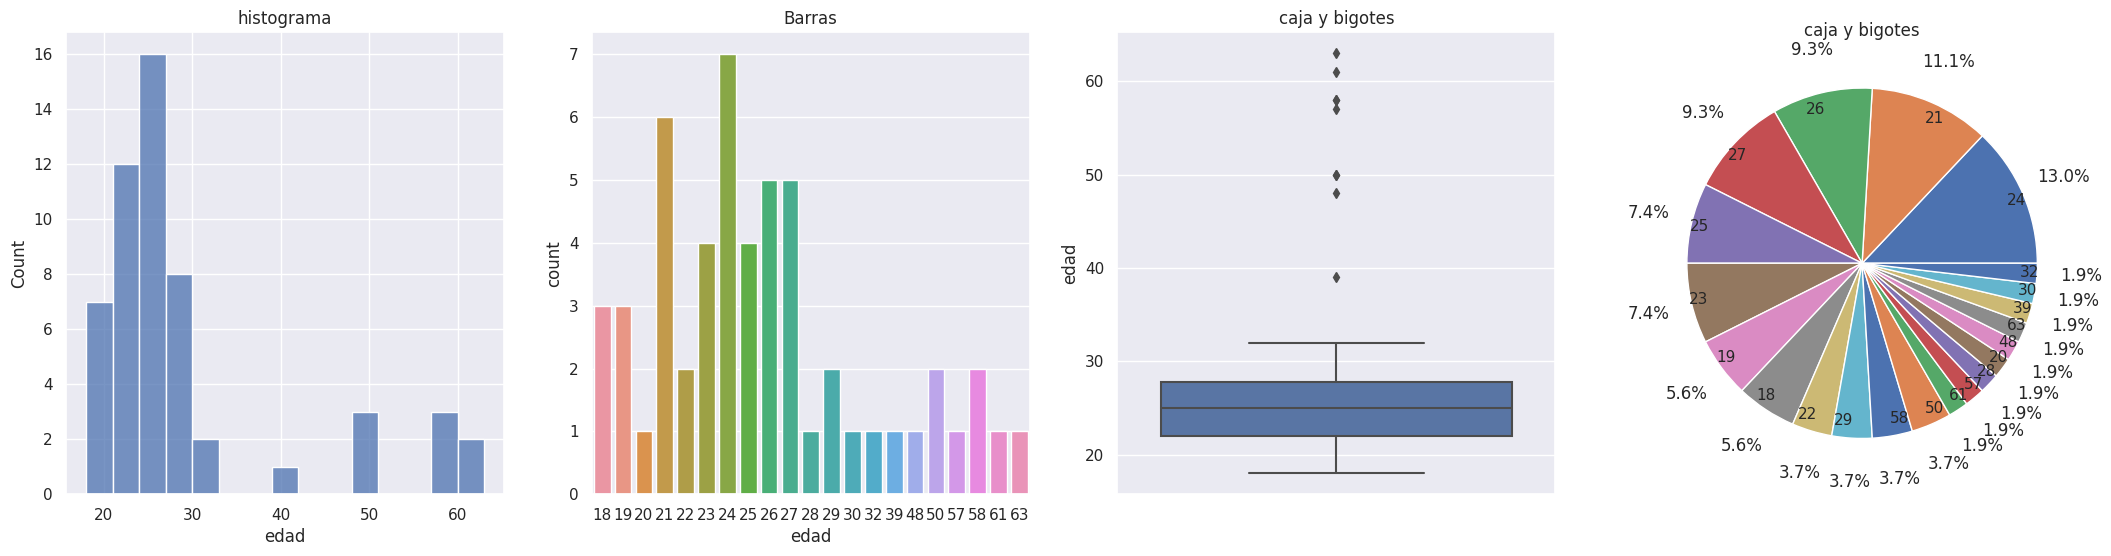

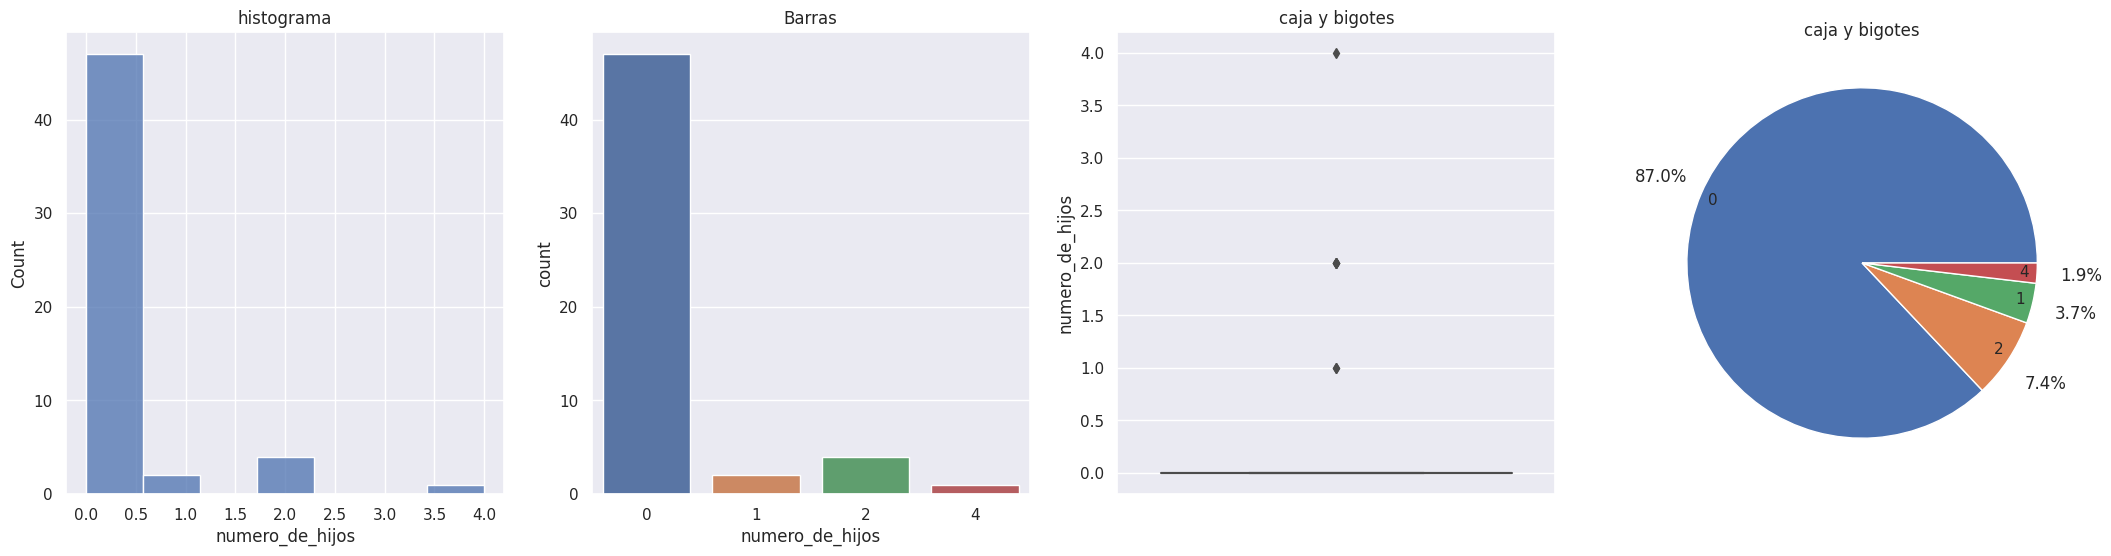

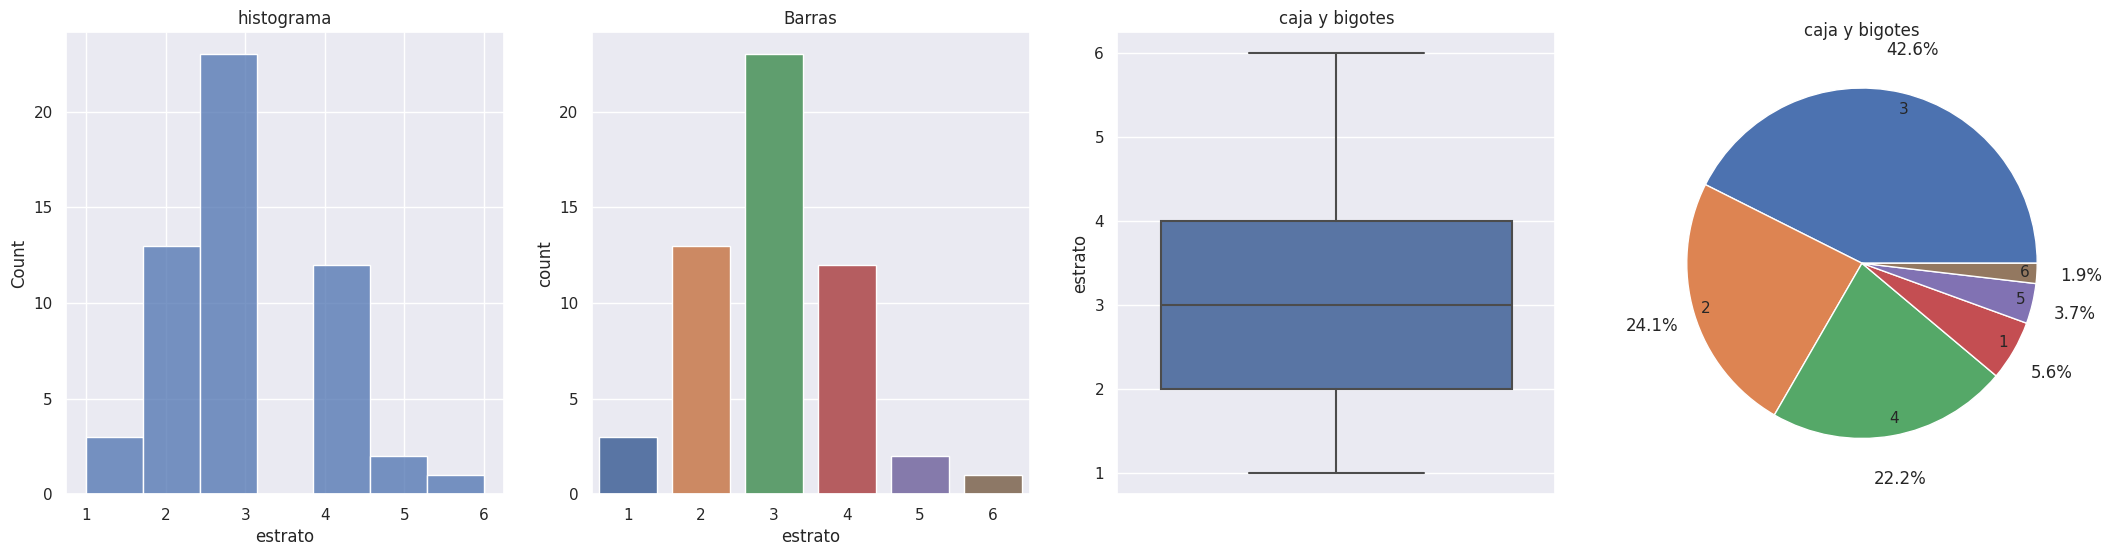

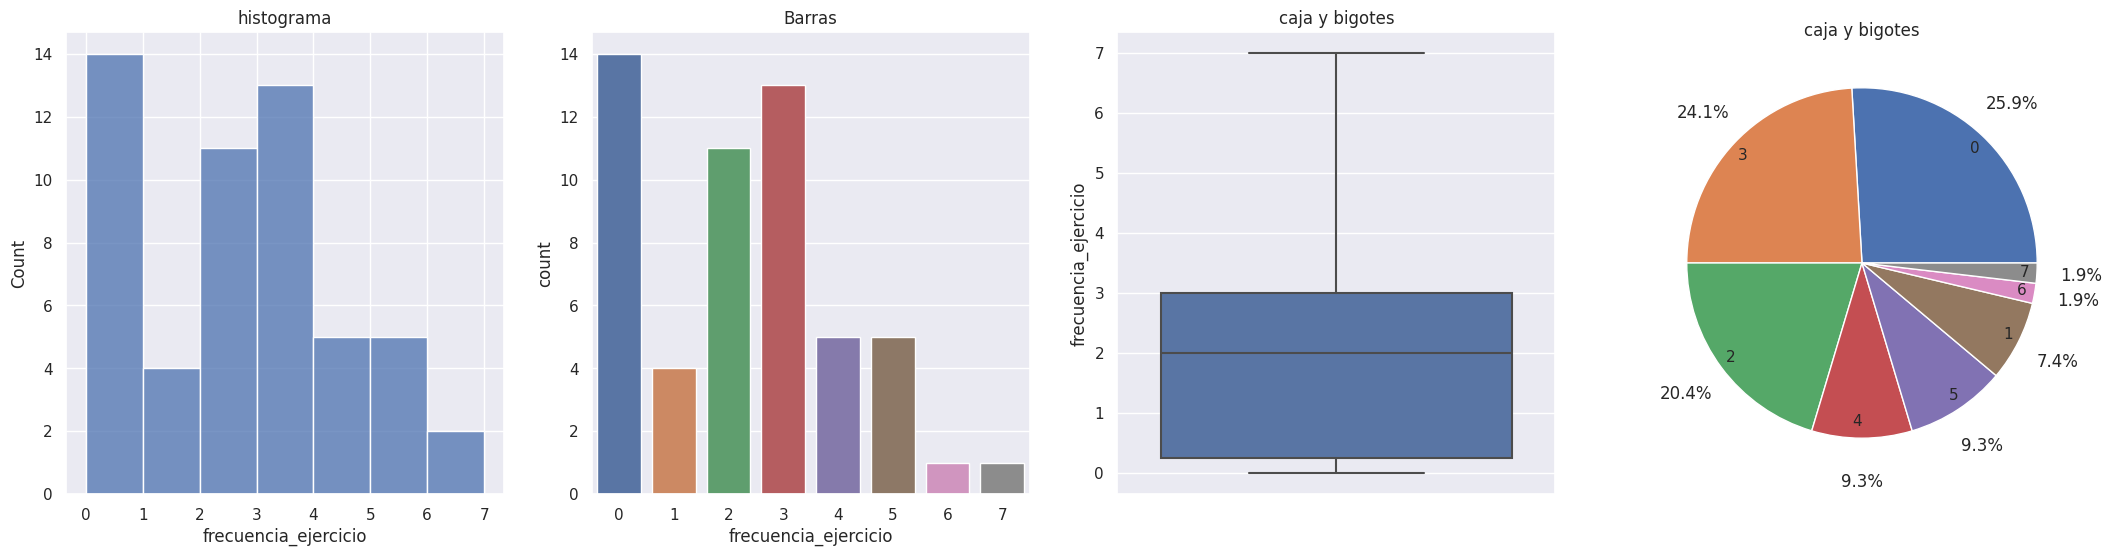

In [21]:
# %% Graficas pedidas de las variables numericas

def graficas_variable_numerica(variable:str)-> None:
  '''
  Genera el histograma, diagrama de barras, diagrama de caja y el diagrama de torta
  de cada variable numerica.
  '''
  fig, axes = plt.subplots(1, 4, figsize=(26, 6))
  sns.histplot(data=deporte_df,x=variable, ax=axes[0]);
  axes[0].set_title('histograma');
  sns.countplot(data=deporte_df,x=variable, ax=axes[1]);
  axes[1].set_title('Barras');
  sns.boxplot(data=deporte_df,y=variable, ax=axes[2]);
  axes[2].set_title('caja y bigotes');
  deporte_df[variable].value_counts().to_dict()
  axes[3].pie(deporte_df[variable].value_counts().to_dict().values(), labels = deporte_df[variable].value_counts().to_dict().keys(),autopct='%1.1f%%',pctdistance=1.25, labeldistance=.9);
  axes[3].set_title('caja y bigotes');

variables_numericas = deporte_df._get_numeric_data().columns

for variable in variables_numericas:
  graficas_variable_numerica(variable)


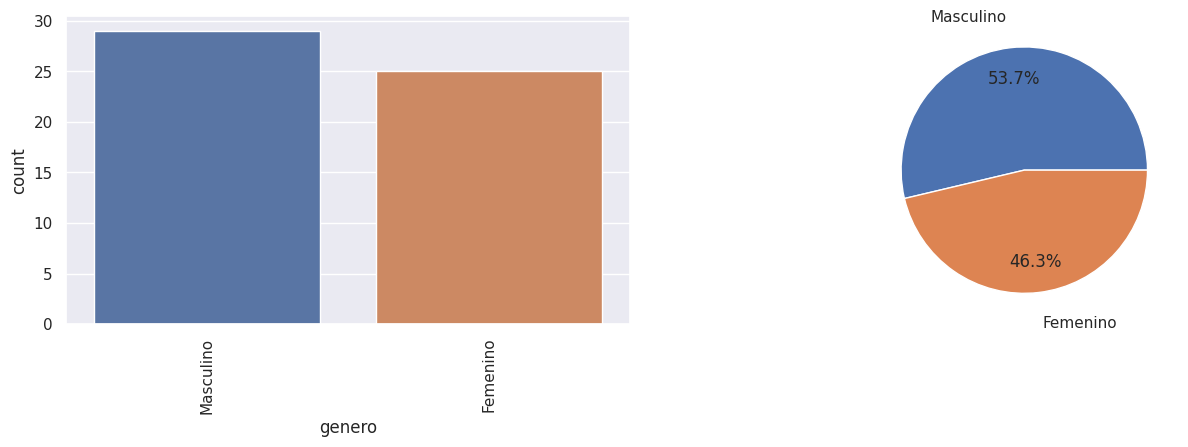

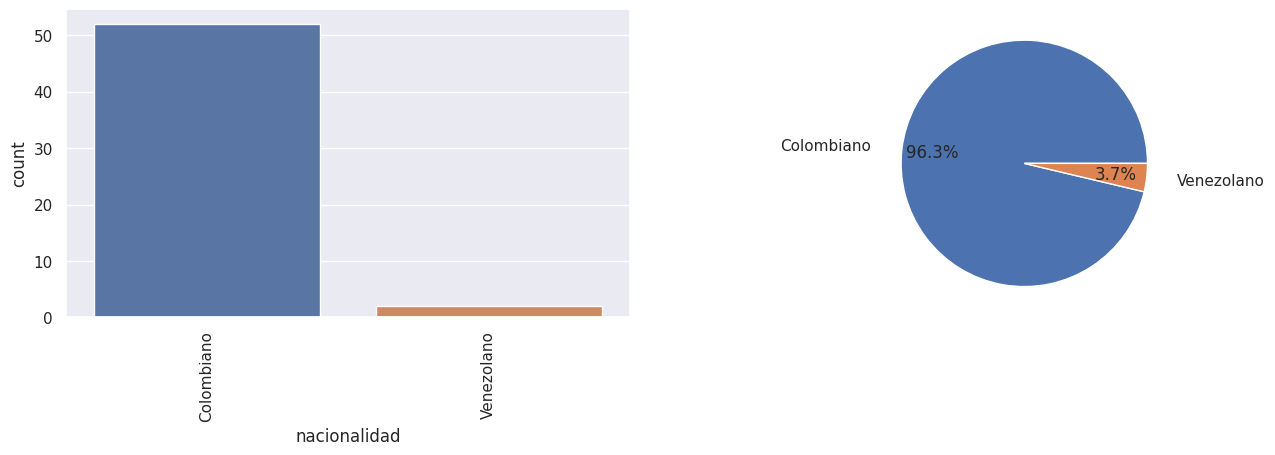

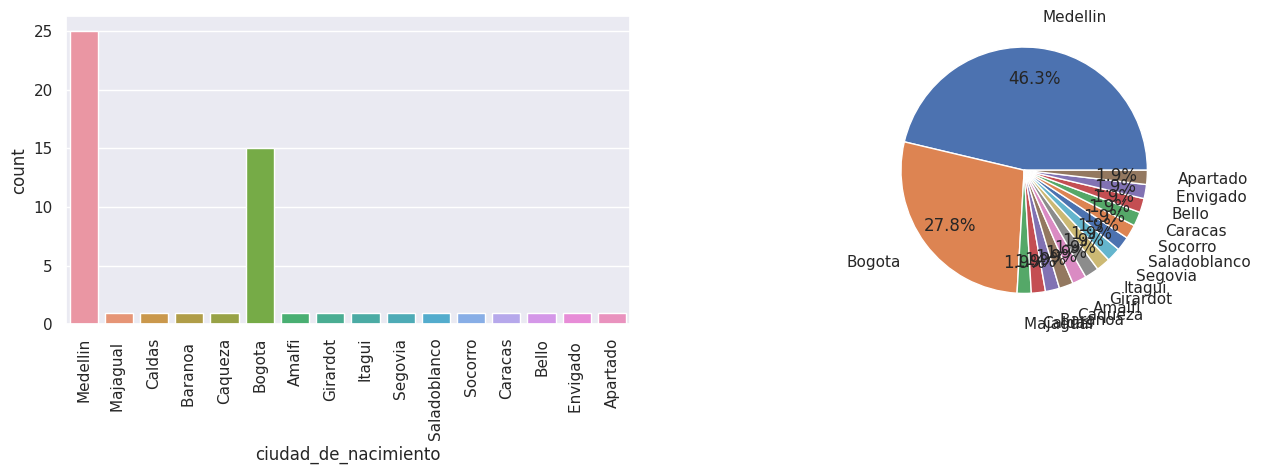

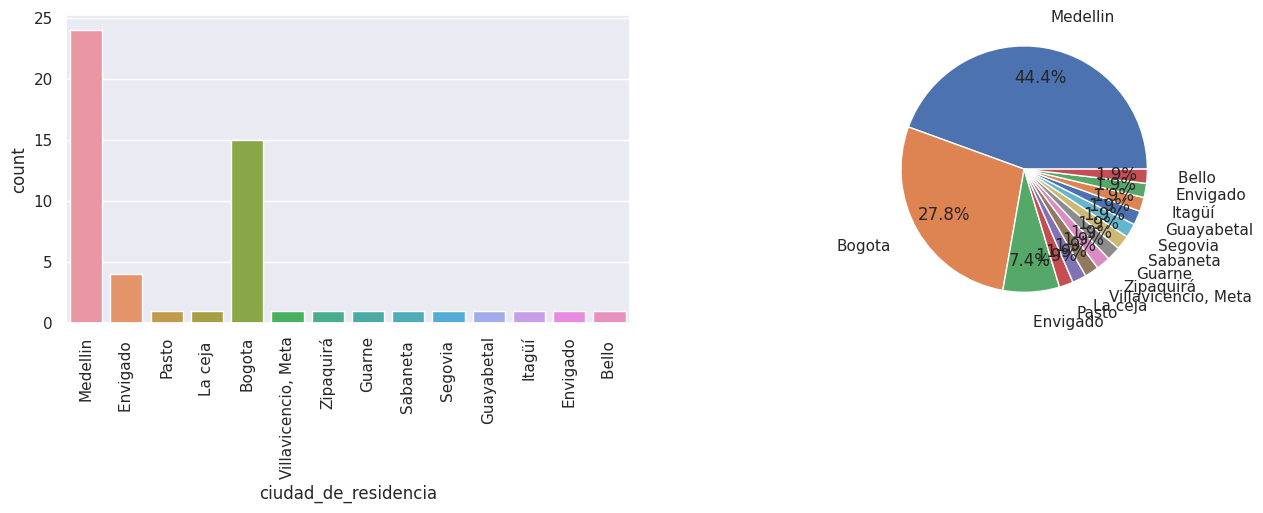

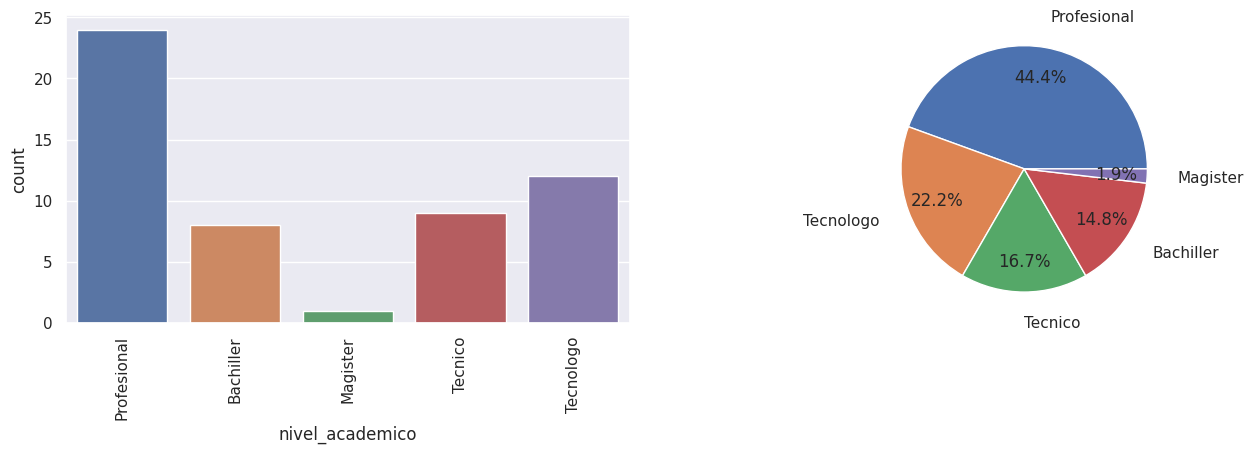

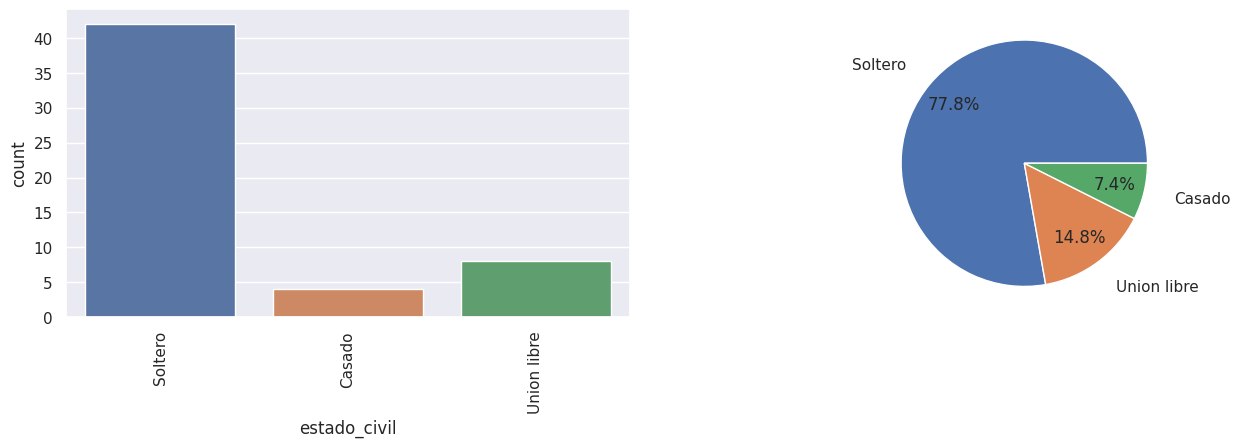

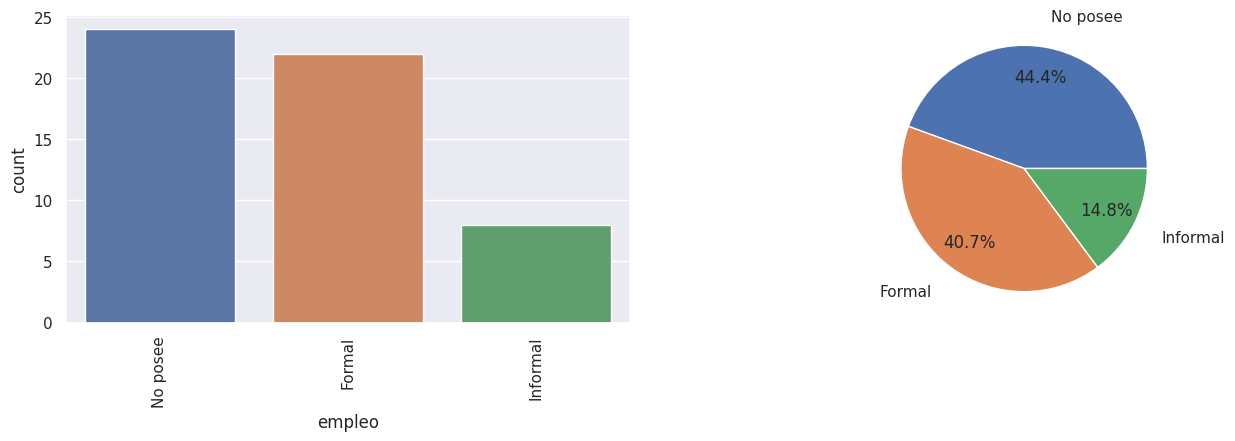

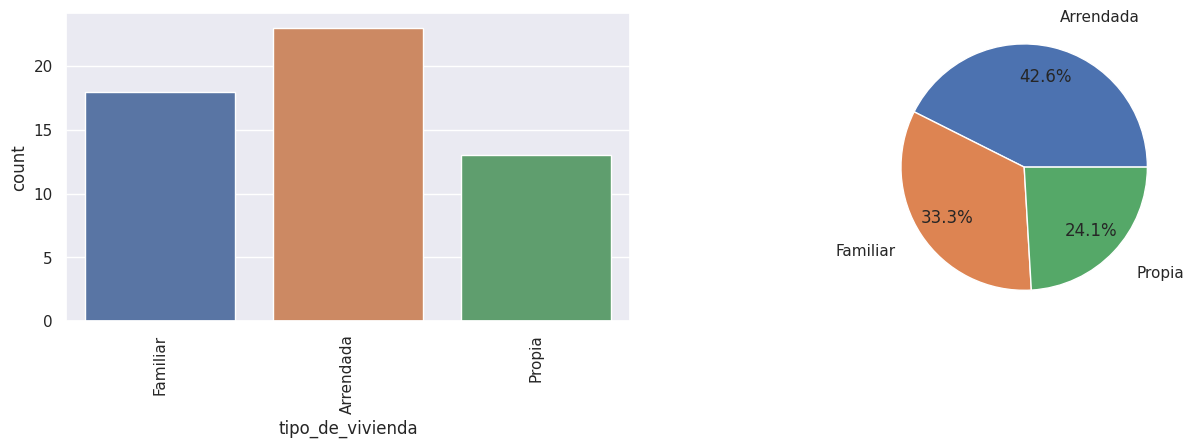

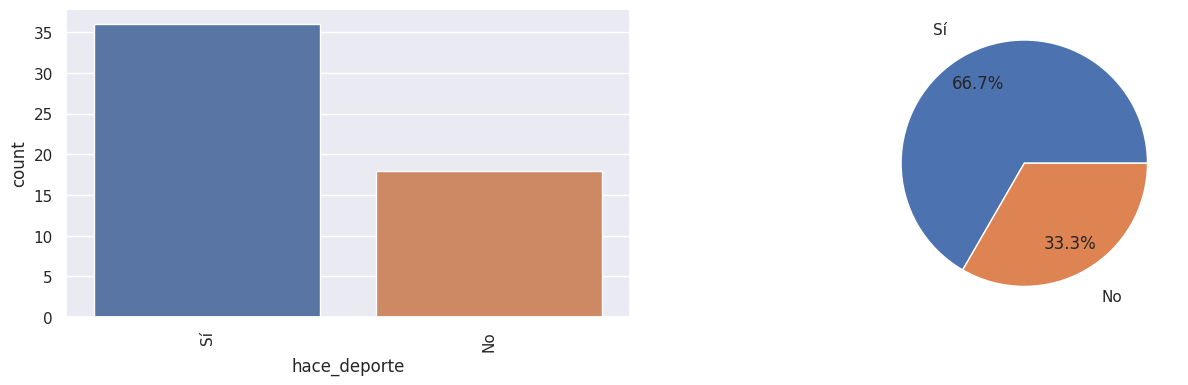

In [22]:
# %% Graficas pedidas de las variables categoricas

def graficas_variable_categorica(variable: str) -> None:

  '''
  Genera el diagrama de barras y el diagrama de torta de cada variable numerica.
  '''
  __, axes = plt.subplots(1, 2, figsize=(16, 4));
  sns.countplot(data=deporte_df,x=variable, ax= axes[0]);
  axes[0].set_xticklabels(deporte_df[variable].unique(),rotation=90);
  axes[1].pie(deporte_df[variable].value_counts().to_dict().values(), labels = deporte_df[variable].value_counts().to_dict().keys(),autopct='%1.1f%%',pctdistance=0.75, labeldistance=1.25);

variables_catergoricas = [variable for variable in deporte_df.columns if not variable in variables_numericas]
variables_catergoricas.pop(0)
variables_catergoricas.pop(0)

for variable in variables_catergoricas:
  graficas_variable_categorica(variable)

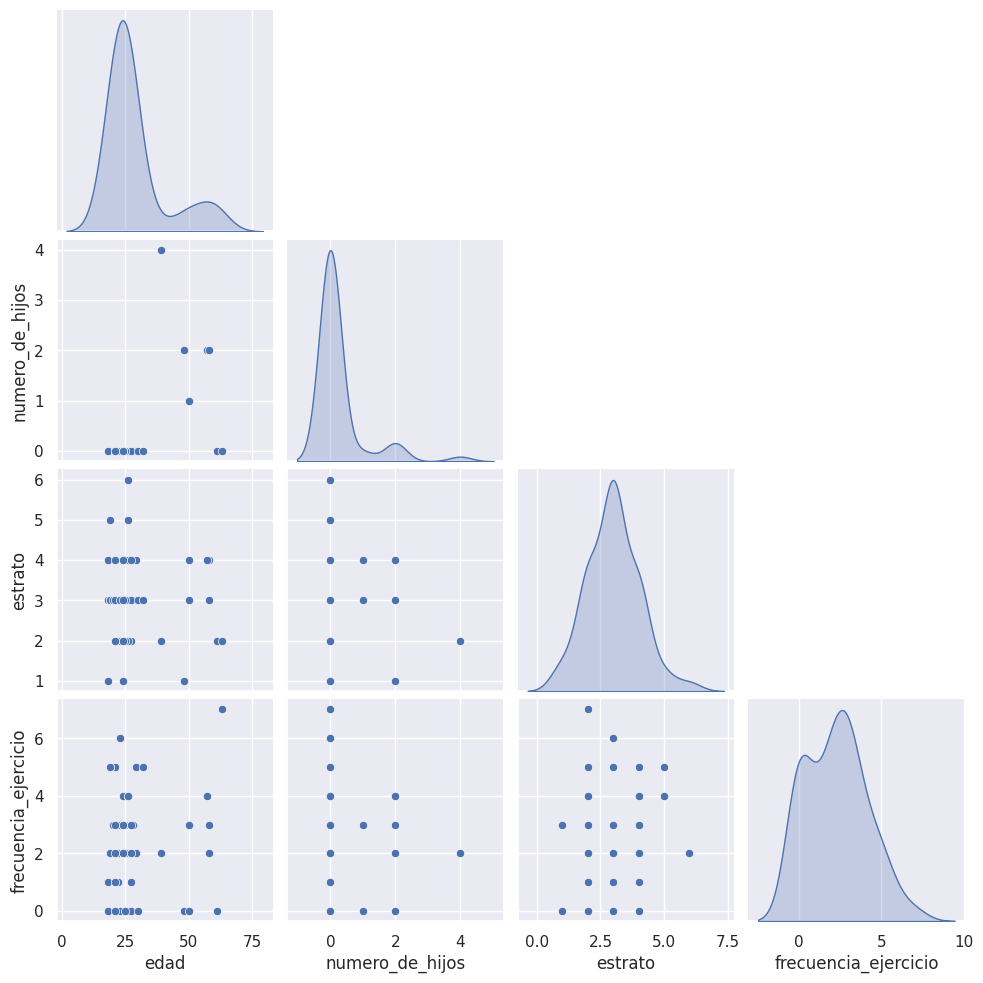

In [23]:
# %% Emperejamiento de variables numericas
sns.pairplot(data=deporte_df, corner=True, diag_kind='kde');

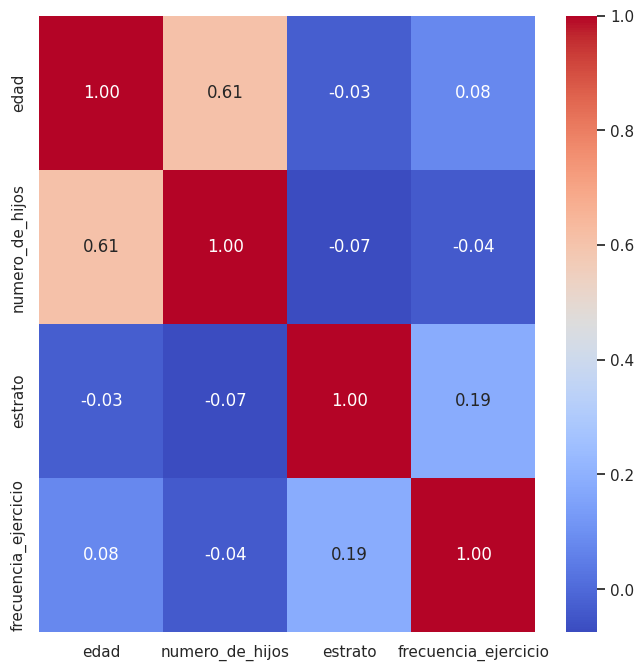

In [24]:
# %% Matriz de correlacion de la variables numericas
plt.subplots(figsize=(8, 8));
sns.heatmap(deporte_df.corr('pearson',numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', cbar=True);

<p><a name="Preguntas"></a></p>

# **SOLUCIÓN A LAS PREGUNTAS**

<a href="#contenido">Volver al contenido</a><br>

In [25]:
# %% Conteo de generos
deporte_df.genero.value_counts()

Masculino    29
Femenino     25
Name: genero, dtype: int64

In [26]:
# %% Conteo de nacionalidades
deporte_df.nacionalidad.value_counts()

Colombiano    52
Venezolano     2
Name: nacionalidad, dtype: int64

In [27]:
# %% Conteo de niveles academicos
deporte_df.nivel_academico.value_counts()

Profesional    24
Tecnologo      12
Tecnico         9
Bachiller       8
Magister        1
Name: nivel_academico, dtype: int64

In [28]:
# %% Conteo de hijos
deporte_df.numero_de_hijos.value_counts()

0    47
2     4
1     2
4     1
Name: numero_de_hijos, dtype: int64

In [29]:
# %% Personas que tienen dos o más hijos
len(deporte_df.numero_de_hijos[deporte_df.numero_de_hijos >= 2])

5

In [30]:
# %% Conteo de empleos
deporte_df.empleo.value_counts()

No posee    24
Formal      22
Informal     8
Name: empleo, dtype: int64

In [31]:
# %% Conteo de viviendas
deporte_df.tipo_de_vivienda.value_counts()

Arrendada    23
Familiar     18
Propia       13
Name: tipo_de_vivienda, dtype: int64

In [32]:
# %% Conteo de viviendas
deporte_df.estrato.value_counts()

3    23
2    13
4    12
1     3
5     2
6     1
Name: estrato, dtype: int64

In [33]:
# %% Personas que viven en su misma ciudad de nacimiento
len(deporte_df.ciudad_de_nacimiento[deporte_df.ciudad_de_nacimiento == deporte_df.ciudad_de_residencia])

28

In [34]:
# %% personas tienen más de 18 años y menos de 30 años
len(deporte_df.edad[(deporte_df.edad > 18) & (deporte_df.edad < 30)])

40

In [35]:
# %% personas tienen más de 30 años y menos de 50 años
len(deporte_df.edad[(deporte_df.edad > 30) & (deporte_df.edad < 50)])

3

In [36]:
# %% personas tienen más de 50 años
len(deporte_df.edad[deporte_df.edad > 50])

5

<p><a name="Extra"></a></p>

# **Analisis por grupos**

<a href="#contenido">Volver al contenido</a><br>

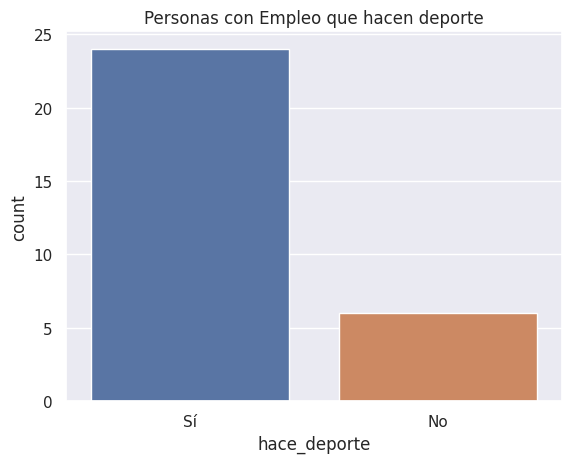

In [37]:
X = deporte_df.hace_deporte[deporte_df.empleo != 'No posee']
plt.title('Personas con Empleo que hacen deporte')
sns.countplot(x=X);

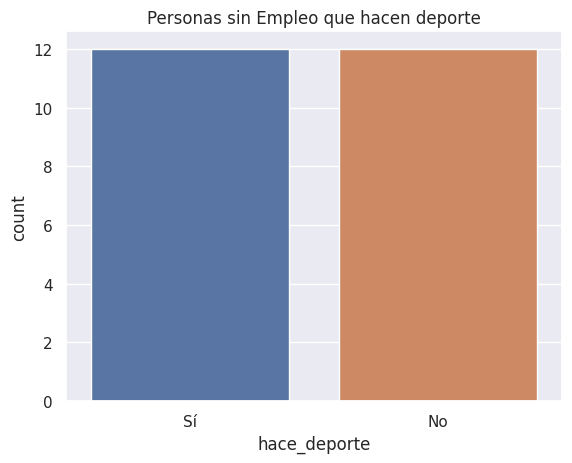

In [38]:
X = deporte_df.hace_deporte[deporte_df.empleo == 'No posee']
plt.title('Personas sin Empleo que hacen deporte')
sns.countplot(x=X);

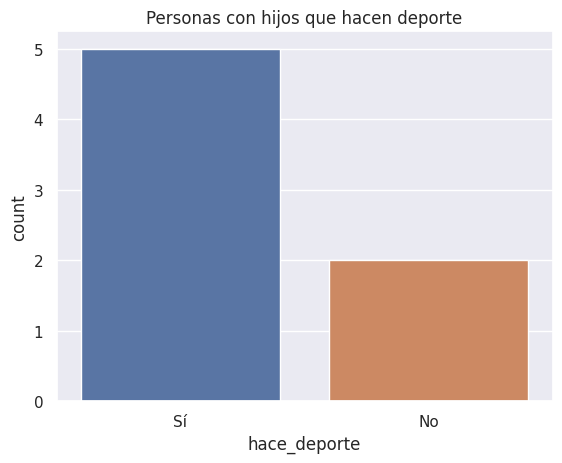

In [39]:
X = deporte_df.hace_deporte[deporte_df.numero_de_hijos != 0]
plt.title('Personas con hijos que hacen deporte')
sns.countplot(x=X);

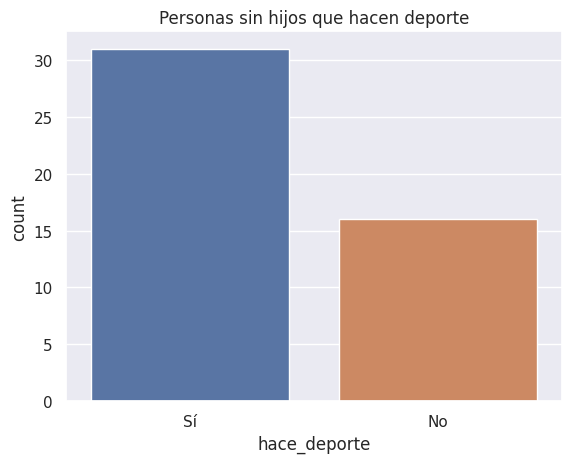

In [40]:
X = deporte_df.hace_deporte[deporte_df.numero_de_hijos == 0]
plt.title('Personas sin hijos que hacen deporte')
sns.countplot(x=X);

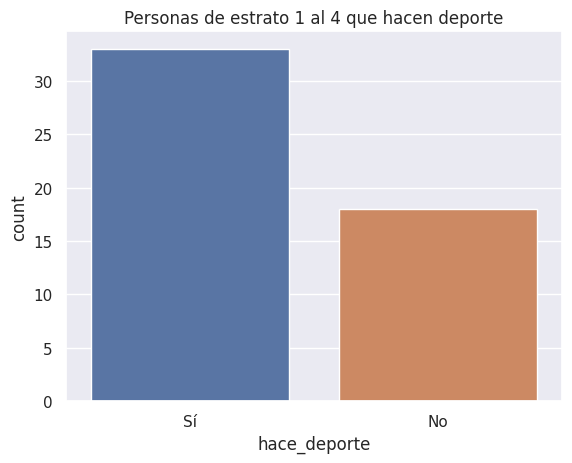

In [41]:
X = deporte_df.hace_deporte[deporte_df.estrato <= 4]
plt.title('Personas de estrato 1 al 4 que hacen deporte')
sns.countplot(x=X);

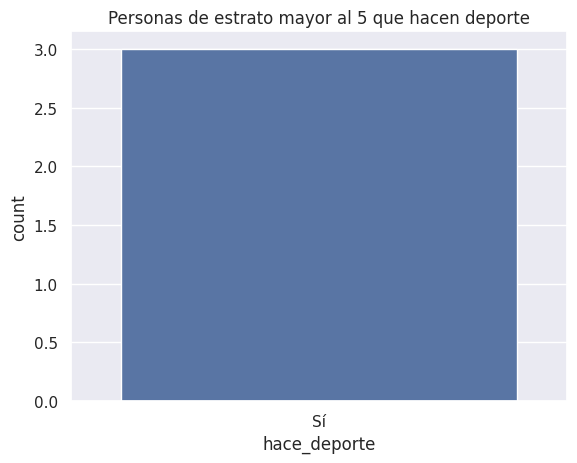

In [42]:
X = deporte_df.hace_deporte[deporte_df.estrato > 4]
plt.title('Personas de estrato mayor al 5 que hacen deporte')
sns.countplot(x=X);